In [243]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [244]:
df=pd.read_csv('german.csv')
df.tail()


,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1
999,0,1,30,2,2,6350,5,5,4,3,...,4,2,31,3,2,1,3,1,1,1


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [246]:
df['Creditability'].replace(
    {1:'Qualified',
    0:'Unqualified'}
    ,inplace=True)

df['Account_Balance'].replace(
    {1:'No_Current_Account_Found',
     2:'Less_than_200_DM',
     3:'From_200_To_999_DM',
     4:'More_than_1000_DM'},
    inplace=True)

df['Purpose'].replace(
    {0:'unknown',
     1:'New_car',
     2:'Used_car',
     3:'Furniture',
     4:'Home_appliances',
     5:'Tv_or_Radio',
     6:'Tuition_fees',
     8:'Vacation',
     9:'personal_reason',
     10:'Ather'},
    inplace=True)

df['Value_Savings_Stocks'].replace(
    {1:'less_than_100_DM',
     2:'From_100_To_499_DM',
     3:'Form_500_To_999_DM',
     4:'More_than_1000_DM',
     5:'Unknown'},
    inplace=True)

df['Length_of_current_employment'].replace(
    {1:'Less_than_year',
     2:'From_1year_to_4years',
     3:'From_4years_to_7years',
     4:'More_than_7years',
     5:'Unemployed'},
    inplace=True)
df['Sex_Marital_Status'].replace(
    {1:'Single_male',
     2:'Married_female',
     3:'Married_male',
     4:'Divorced'},
    inplace=True)

df['Most_valuable_available_asset'].replace(
    {1:'car',
     2:'Property_Ownership',
     3:'Life_insurance',
     4:'Nothing'},
    inplace=True)

df['Concurrent_Credits'].replace(
    {1:'Nothing',
     2:'Store',
     3:'Another_bank'},
    inplace=True)
df['Type_of_apartment'].replace(
    {1:'Rent',
     2:'Joint_ownership',
     3:'Private_ownership'},
    inplace=True)

df['Occupation'].replace(
    {1:'Unemployed',
     2:'simple_employee',
     3:'Good employee',
     4:'Highly paid worker'},
    inplace=True)

df['Telephone'].replace(
    {1:'Yes',
     2:'NO'},
    inplace=True)

df['Foreign_Worker'].replace(
    {1:'Yes',
     2:'No'},
    inplace=True)

df['Instalment_per_cent'].replace(
    {1: '20% of income',
     2: '25% of income',
     3: '30% of income',
     4: '35% of income'},
    inplace=True)

df['Guarantors'].replace(
    {1: 'None',
     2: 'Partner',
     3: 'Other Guarantor'}, 
    inplace=True)

df['Most_valuable_available_asset'].replace(
    {1: 'Car',
     2: 'Property',
     3: 'Life Insurance',
     4: 'No valuable asset'},
    inplace=True)


In [247]:
object_col=df.select_dtypes('object').columns
df[object_col]=df[object_col].astype('category')
categorical_col=df.select_dtypes('category').columns
categorical_col

Index(['Creditability', 'Account_Balance', 'Purpose', 'Value_Savings_Stocks',
       'Length_of_current_employment', 'Instalment_per_cent',
       'Sex_Marital_Status', 'Guarantors', 'Most_valuable_available_asset',
       'Concurrent_Credits', 'Type_of_apartment', 'Occupation', 'Telephone',
       'Foreign_Worker'],
      dtype='object')

In [248]:
for i in categorical_col[:2]:
    print('🔹',df[i].value_counts())
    print('*'*30)

🔹 Creditability
Qualified      700
Unqualified    300
Name: count, dtype: int64
******************************
🔹 Account_Balance
More_than_1000_DM           394
No_Current_Account_Found    274
Less_than_200_DM            269
From_200_To_999_DM           63
Name: count, dtype: int64
******************************


In [249]:
for i in categorical_col[2:5]:
    print('🔹',df[i].value_counts())
    print('*'*30)

🔹 Purpose
Furniture          280
unknown            234
Used_car           181
New_car            103
personal_reason     97
Tuition_fees        50
Tv_or_Radio         22
Ather               12
Home_appliances     12
Vacation             9
Name: count, dtype: int64
******************************
🔹 Value_Savings_Stocks
less_than_100_DM      603
Unknown               183
From_100_To_499_DM    103
Form_500_To_999_DM     63
More_than_1000_DM      48
Name: count, dtype: int64
******************************
🔹 Length_of_current_employment
From_4years_to_7years    339
Unemployed               253
More_than_7years         174
From_1year_to_4years     172
Less_than_year            62
Name: count, dtype: int64
******************************


In [250]:
for i in categorical_col[5:9]:
    print('🔹',df[i].value_counts())
    print('*'*30)

🔹 Instalment_per_cent
35% of income    476
25% of income    231
30% of income    157
20% of income    136
Name: count, dtype: int64
******************************
🔹 Sex_Marital_Status
Married_male      548
Married_female    310
Divorced           92
Single_male        50
Name: count, dtype: int64
******************************
🔹 Guarantors
None               907
Other Guarantor     52
Partner             41
Name: count, dtype: int64
******************************
🔹 Most_valuable_available_asset
Life_insurance        332
car                   282
Property_Ownership    232
Nothing               154
Name: count, dtype: int64
******************************


In [251]:
for i in categorical_col[9:]:
    print('🔹',df[i].value_counts())
    print('*'*30)

🔹 Concurrent_Credits
Another_bank    814
Nothing         139
Store            47
Name: count, dtype: int64
******************************
🔹 Type_of_apartment
Joint_ownership      714
Rent                 179
Private_ownership    107
Name: count, dtype: int64
******************************
🔹 Occupation
Good employee         630
simple_employee       200
Highly paid worker    148
Unemployed             22
Name: count, dtype: int64
******************************
🔹 Telephone
Yes    596
NO     404
Name: count, dtype: int64
******************************
🔹 Foreign_Worker
Yes    963
No      37
Name: count, dtype: int64
******************************


In [252]:
if df.isnull().sum().sum() == 0:
    print('✅ Not found any null values')
else:
    print('⚠️ Null values found:')
    print(df.isnull().sum())


✅ Not found any null values


<Axes: ylabel='count'>

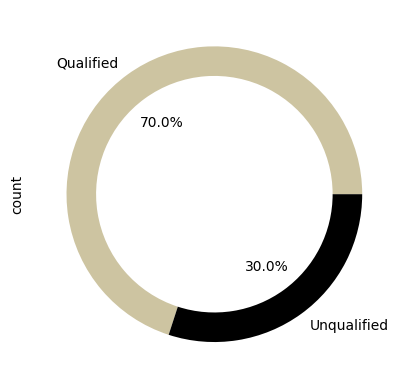

In [253]:
df.Creditability.value_counts().plot(kind='pie' ,autopct="%1.1f%%",colors=['#CDC4A1','black'],explode=(0,0),wedgeprops=dict(width=0.2))
#TODO balance to target column

In [254]:
column_numerical=df.drop(['No_of_dependents','No_of_Credits_at_this_Bank','Payment_Status_of_Previous_Credit'],axis=1).select_dtypes('number').columns
column_numerical

Index(['Duration_of_Credit_monthly', 'Credit_Amount',
       'Duration_in_Current_address', 'Age_years'],
      dtype='object')

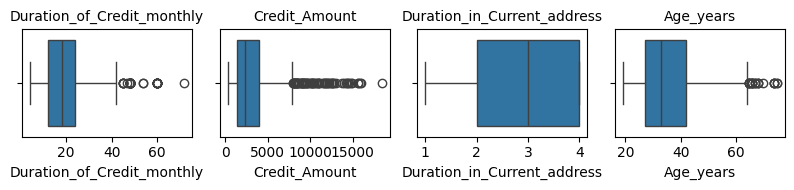

In [255]:
#check Outliers
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = len(column_numerical)
rows = math.ceil(len(column_numerical) / cols)

plt.figure(figsize=(cols * 2, rows * 2))

for i, col in enumerate(column_numerical, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col])
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()


In [256]:
categorical_col

Index(['Creditability', 'Account_Balance', 'Purpose', 'Value_Savings_Stocks',
       'Length_of_current_employment', 'Instalment_per_cent',
       'Sex_Marital_Status', 'Guarantors', 'Most_valuable_available_asset',
       'Concurrent_Credits', 'Type_of_apartment', 'Occupation', 'Telephone',
       'Foreign_Worker'],
      dtype='object')

<Axes: xlabel='Purpose'>

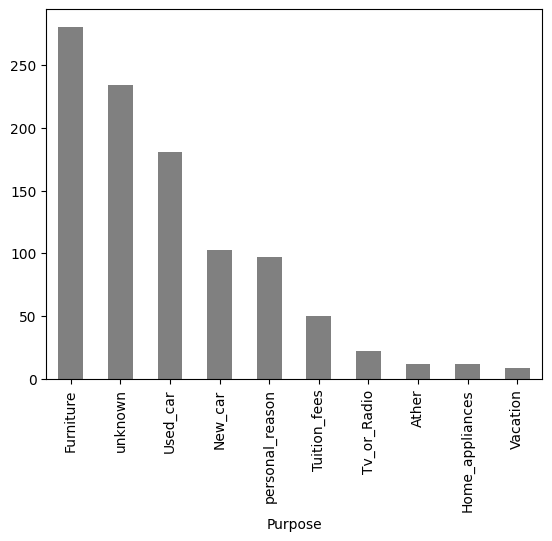

In [257]:
df['Purpose'].value_counts().plot(kind='bar',color='gray')


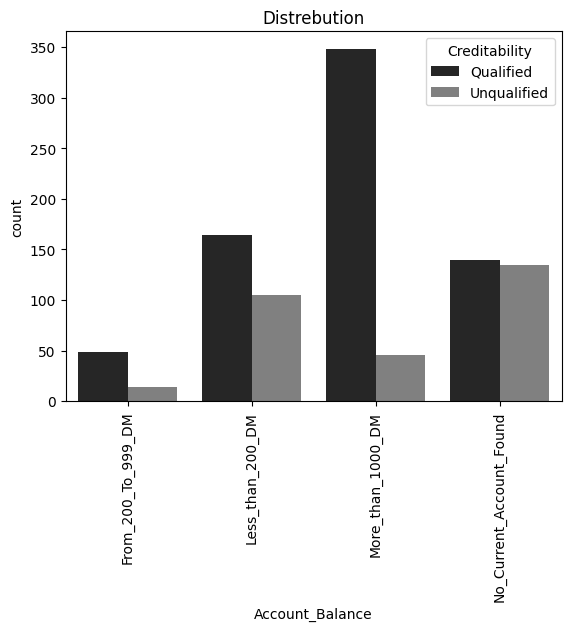

In [258]:
sns.countplot(data=df,x='Account_Balance',hue='Creditability',color='gray')
plt.xticks(rotation=90)
plt.title('Distrebution')
plt.grid(False)
plt.show()

<Axes: xlabel='Age_years'>

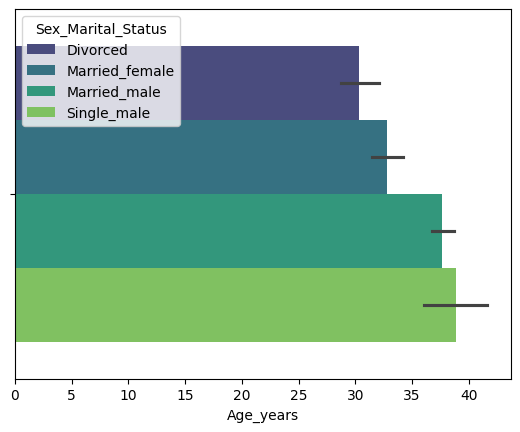

In [259]:
sns.barplot(data=df,hue='Sex_Marital_Status',x='Age_years',palette='viridis')

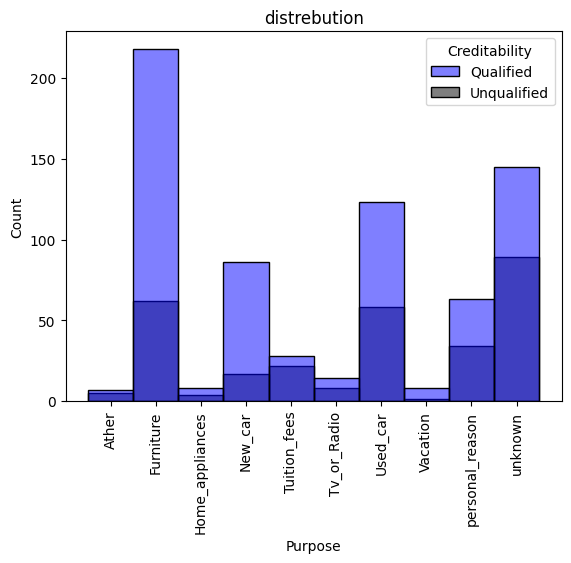

In [260]:
sns.histplot(data=df,x='Purpose',hue='Creditability',palette=['blue','black'])
plt.xticks(rotation=90)
plt.title('distrebution')
plt.show()

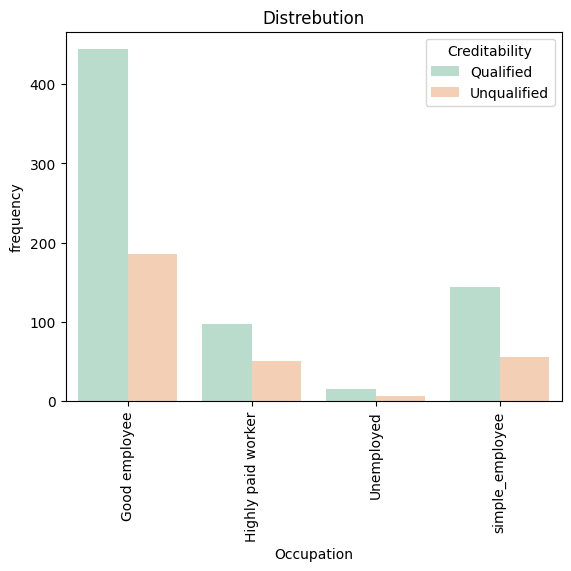

In [261]:
sns.countplot(data=df,hue='Creditability',x='Occupation',palette='Pastel2')
plt.xticks(rotation=90)
plt.ylabel('frequency')
plt.title('Distrebution')
plt.show()

Building Model
 

In [262]:
df_tomodel=pd.read_csv('german.csv')
df_tomodel

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [263]:
column_numerical

Index(['Duration_of_Credit_monthly', 'Credit_Amount',
       'Duration_in_Current_address', 'Age_years'],
      dtype='object')

In [264]:
numerical=['Duration_of_Credit_monthly', 'Credit_Amount',
       'Duration_in_Current_address', 'Age_years']

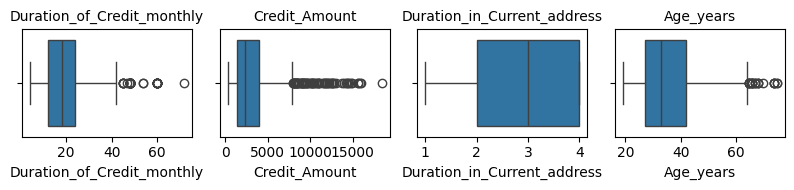

In [265]:
#check Outliers
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = len(numerical)
rows = math.ceil(len(numerical) / cols)

plt.figure(figsize=(cols * 2, rows * 2))

for i, col in enumerate(numerical, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df_tomodel[col])
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()

In [266]:
#handle Outliers
Q1 = df_tomodel[numerical].quantile(0.25)
Q3 = df_tomodel[numerical].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in numerical:
    for i in range(len(df[col])):  
        if df_tomodel[col][i] < lower_bound[col]:  
            df_tomodel.at[i, col] = lower_bound[col]  
        elif df_tomodel[col][i] > upper_bound[col]:  
            df_tomodel.at[i, col] = upper_bound[col]
            

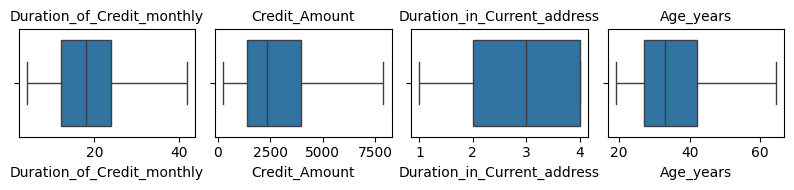

In [267]:
#check Outliers
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = len(numerical)
rows = math.ceil(len(numerical) / cols)

plt.figure(figsize=(cols * 2, rows * 2))

for i, col in enumerate(numerical, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df_tomodel[col])
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()

In [268]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [269]:
x=df_tomodel.drop('Creditability',axis=1)
y=df_tomodel['Creditability']

In [270]:
from sklearn.feature_selection import SelectKBest, f_classif
selector=SelectKBest(score_func=f_classif,k=12)
feature_names = [
    'Creditability', 'Account_Balance', 'Duration_of_Credit_monthly',
    'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
    'Value_Savings_Stocks', 'Length_of_current_employment',
    'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
    'Duration_in_Current_address', 'Most_valuable_available_asset',
    'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
    'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
    'Telephone', 'Foreign_Worker'
]
x_new=selector.fit_transform(x,y)
selected_mask = selector.get_support()
selected_feature_names = [name for name, selected in zip(feature_names, selected_mask) if selected]

print("Selected Features:")
print(selected_feature_names)
print(len(selected_feature_names))


Selected Features:
['Creditability', 'Account_Balance', 'Duration_of_Credit_monthly', 'Purpose', 'Credit_Amount', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Instalment_per_cent', 'Duration_in_Current_address', 'Most_valuable_available_asset', 'Age_years', 'Telephone']
12


In [271]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Creditability, Length: 1000, dtype: int64

In [272]:
df=df[['Creditability', 'Account_Balance', 'Duration_of_Credit_monthly', 'Purpose', 'Credit_Amount', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Instalment_per_cent', 'Duration_in_Current_address', 'Most_valuable_available_asset', 'Age_years', 'Telephone']]
df

,Creditability,Account_Balance,Duration_of_Credit_monthly,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Telephone
0,Qualified,No_Current_Account_Found,18,Used_car,1049,less_than_100_DM,From_1year_to_4years,35% of income,4,Property_Ownership,21,Yes
1,Qualified,No_Current_Account_Found,9,unknown,2799,less_than_100_DM,From_4years_to_7years,25% of income,2,car,36,Yes
2,Qualified,Less_than_200_DM,12,personal_reason,841,From_100_To_499_DM,More_than_7years,25% of income,4,car,23,Yes
3,Qualified,No_Current_Account_Found,12,unknown,2122,less_than_100_DM,From_4years_to_7years,30% of income,2,car,39,Yes
4,Qualified,No_Current_Account_Found,12,unknown,2171,less_than_100_DM,From_4years_to_7years,35% of income,4,Property_Ownership,38,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Unqualified,No_Current_Account_Found,24,Furniture,1987,less_than_100_DM,From_4years_to_7years,25% of income,4,car,21,Yes
996,Unqualified,No_Current_Account_Found,24,unknown,2303,less_than_100_DM,Unemployed,35% of income,1,car,45,Yes
997,Unqualified,More_than_1000_DM,21,unknown,12680,Unknown,Unemployed,35% of income,4,Nothing,30,NO
998,Unqualified,Less_than_200_DM,12,Furniture,6468,Unknown,Less_than_year,25% of income,1,Nothing,52,NO


In [ ]:
df['Creditability'].value_counts()
from 

Creditability
Qualified      700
Unqualified    300
Name: count, dtype: int64

In [273]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.25456565, -0.21743962,  1.34401408, ..., -0.42828957,
        -0.82331789, -0.19601428],
       [-1.25456565, -1.0657086 ,  1.34401408, ...,  2.33486893,
        -0.82331789, -0.19601428],
       [-0.45902624, -0.78295227, -0.50342796, ..., -0.42828957,
        -0.82331789, -0.19601428],
       ...,
       [ 1.13205258,  0.06531671,  1.34401408, ..., -0.42828957,
         1.21459768, -0.19601428],
       [-0.45902624, -0.78295227, -0.50342796, ..., -0.42828957,
         1.21459768, -0.19601428],
       [-1.25456565,  0.91358569, -0.50342796, ..., -0.42828957,
        -0.82331789, -0.19601428]])

In [274]:
x=torch.tensor(x,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [275]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [276]:
class Creditability(nn.Module):
    def __init__(self,input_features , output_features,hidden_units=25):
        super().__init__()
        self.linear_layer_stack=nn.Sequential(
            nn.Linear(in_features=input_features,out_features=30),
            nn.Softplus(),
            nn.Linear(in_features=30,out_features=hidden_units),
            nn.Sigmoid(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.Sigmoid(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.Sigmoid(),
            nn.Linear(in_features=hidden_units,out_features=output_features),

        )
        
    def forward(self,x):
        return self.linear_layer_stack(x)
    
model=Creditability(x.shape[1],1)

In [277]:
#calculate the loss(ERORR)
loss_func=nn.BCEWithLogitsLoss()
#update baises and weights
optimizer=torch.optim.Adam(model.parameters(),lr=0.0001)

In [278]:
#calculate acc
# accuracy function
def accuracy(y_true, y_pred):
    y_true = y_true.view(-1)
    y_pred = y_pred.view(-1)
    return (torch.eq(y_true, y_pred).sum().item() / len(y_true)) * 100


In [279]:
torch.manual_seed(42)
epochs=2280

for epoch in range(epochs):
     model.train()
     train_logits=model(X_train)
     train_predict=torch.sigmoid(train_logits)
     loss=loss_func(train_logits,y_train.unsqueeze(1))
     predicted_train = (train_predict > 0.5).float()
     acc = accuracy(y_train, predicted_train)
     optimizer.zero_grad()
     loss.backward()
     optimizer.step()
     
     model.eval()
     with torch.inference_mode():
         test_logits=model(X_test)
         test_pred=torch.sigmoid(test_logits)
         test_loss=loss_func(test_logits,y_test.unsqueeze(1))
         predicted_test=(test_pred > 0.5).float()
         test_acc=accuracy(y_test,predicted_test)
         
     if epoch %10==0:
        print(f'Epoch:{epoch}  |  Loss:{loss:.2f}  |  Accuracy:{acc:.2f}%   |   Test_Loss:{test_loss:.2f}  |  Test_Accuracy:{test_acc:.2f}%')

Epoch:0  |  Loss:0.69  |  Accuracy:29.71%   |   Test_Loss:0.69  |  Test_Accuracy:30.67%
Epoch:10  |  Loss:0.69  |  Accuracy:70.29%   |   Test_Loss:0.69  |  Test_Accuracy:69.33%
Epoch:20  |  Loss:0.69  |  Accuracy:70.29%   |   Test_Loss:0.69  |  Test_Accuracy:69.33%
Epoch:30  |  Loss:0.68  |  Accuracy:70.29%   |   Test_Loss:0.68  |  Test_Accuracy:69.33%
Epoch:40  |  Loss:0.68  |  Accuracy:70.29%   |   Test_Loss:0.68  |  Test_Accuracy:69.33%
Epoch:50  |  Loss:0.68  |  Accuracy:70.29%   |   Test_Loss:0.68  |  Test_Accuracy:69.33%
Epoch:60  |  Loss:0.67  |  Accuracy:70.29%   |   Test_Loss:0.67  |  Test_Accuracy:69.33%
Epoch:70  |  Loss:0.67  |  Accuracy:70.29%   |   Test_Loss:0.67  |  Test_Accuracy:69.33%
Epoch:80  |  Loss:0.67  |  Accuracy:70.29%   |   Test_Loss:0.67  |  Test_Accuracy:69.33%
Epoch:90  |  Loss:0.66  |  Accuracy:70.29%   |   Test_Loss:0.66  |  Test_Accuracy:69.33%
Epoch:100  |  Loss:0.66  |  Accuracy:70.29%   |   Test_Loss:0.66  |  Test_Accuracy:69.33%
Epoch:110  |  Loss:0.

In [280]:
X_test.shape

torch.Size([300, 20])

In [281]:
Account_user=float(input('please enter your balance: '))
Duration_of_Credit_monthly=float(input('enter Duration of Credit monthly: '))
Payment_Status_of_Previous_Credit=eval(in put('enter_Payment_Status_of_Previous_Credit: '))
Purpose=input('enter your Purpose: ')


SyntaxError: invalid syntax (1764326880.py, line 3)